In [12]:
jupyterlab_url = "http://localhost:8888/tree?token=91290d0ea528ffd65725eabc3106913970ed718c7b7d930a"
default_result_path = None
close_on_fail = False
transition_timeout = 10000

In [13]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpcszd0w48'

# nbsearch E2E Test - Notebook Search on Notebook 7

- Test data to prepare: Test notebooks should be indexed in Solr
- Tests NBSearch on Jupyter Notebook 7 interface (/tree endpoint)

In [14]:
import importlib

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *

await init_pw_context(close_on_fail=close_on_fail, last_path=default_result_path)

('20251021-080614',
 '/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpxhby0mnb')

## Open Jupyter Notebook 7 and wait for it to load

Start epoch: 1761001574.8488362 seconds


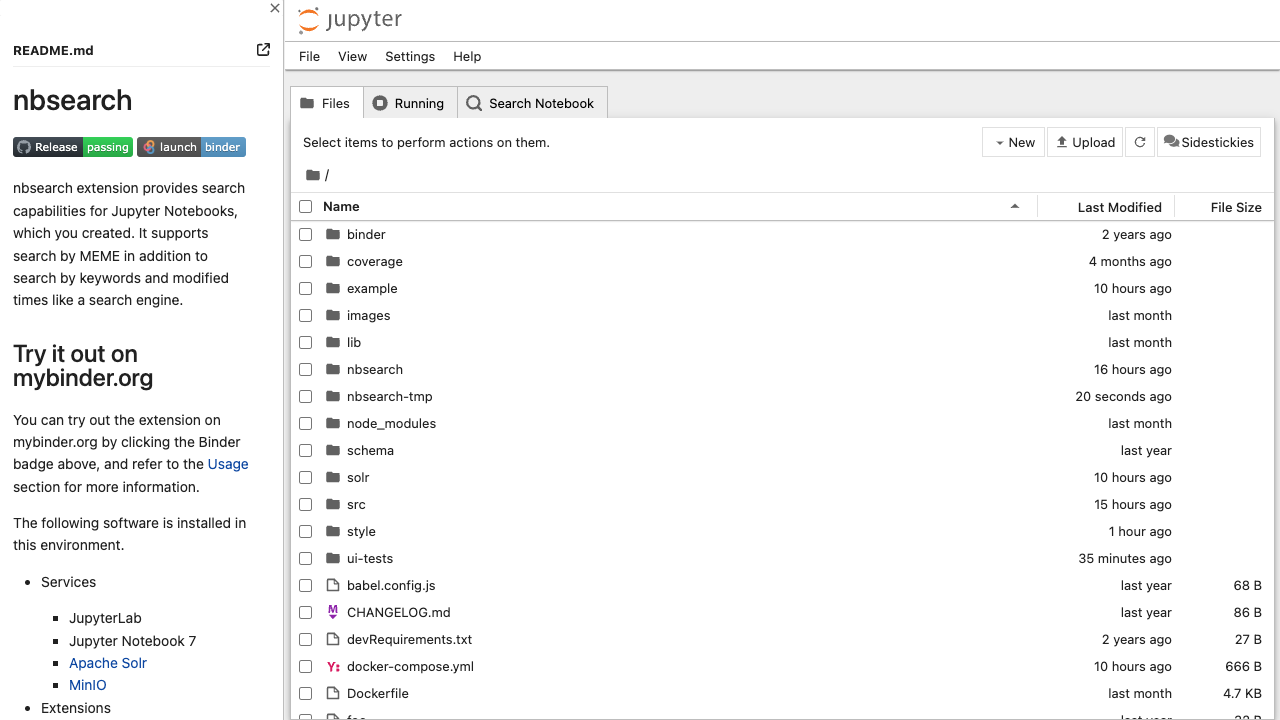

In [15]:
tree_page = None

async def _step(page):
    await page.goto(jupyterlab_url)

    # Wait for Notebook 7 file browser to load
    await expect(page.locator('//*[@data-icon="nbsearch::notebooksearch"]')).to_be_visible(timeout=transition_timeout)

    global tree_page
    tree_page = page

await run_pw(_step)

## Open NBSearch tab

Start epoch: 1761001578.601304 seconds


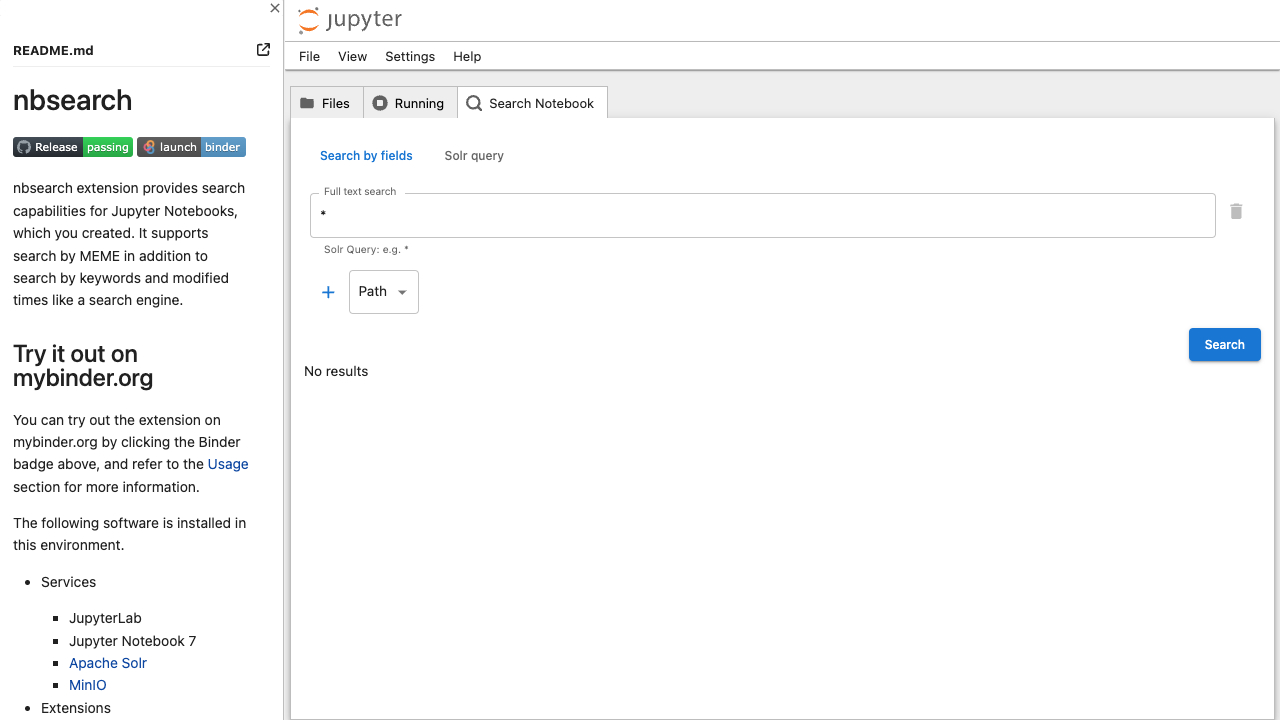

In [16]:
async def _step(page):
    # Click on the NBSearch icon in the left sidebar
    await page.locator('//*[@data-icon="nbsearch::notebooksearch"]').click()

    # Wait for the NBSearch panel to be visible
    await expect(page.locator('.nbsearch-search-root')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## Perform a simple search

Start epoch: 1761001578.795509 seconds


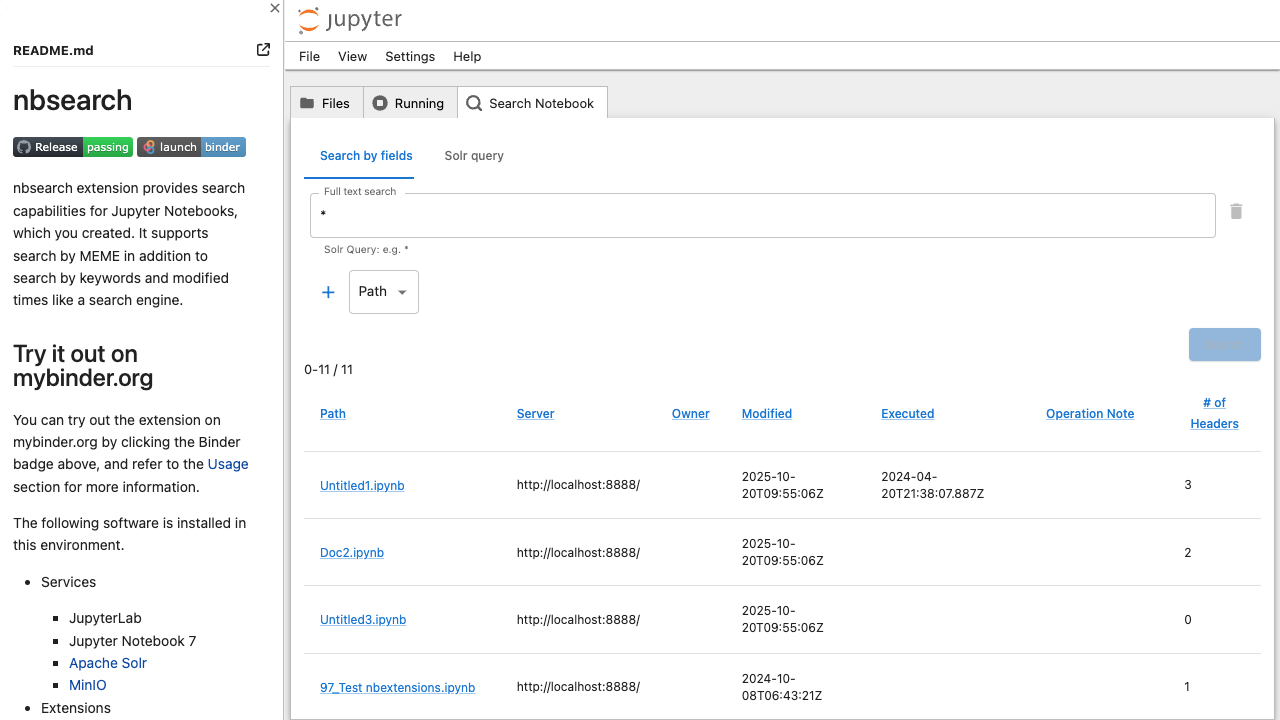

In [17]:
search_query = "*"

async def _step(page):
    # Find the search input field
    search_input = page.locator('.nbsearch-search-root input[type="text"]').first
    await search_input.fill(search_query)

    # Click the search button
    await page.locator('.nbsearch-search-execute button').click()

    # Wait for search results to appear
    await expect(page.locator('.MuiTableBody-root')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## Verify search results are displayed

Start epoch: 1761001579.109406 seconds
Found 11 search results


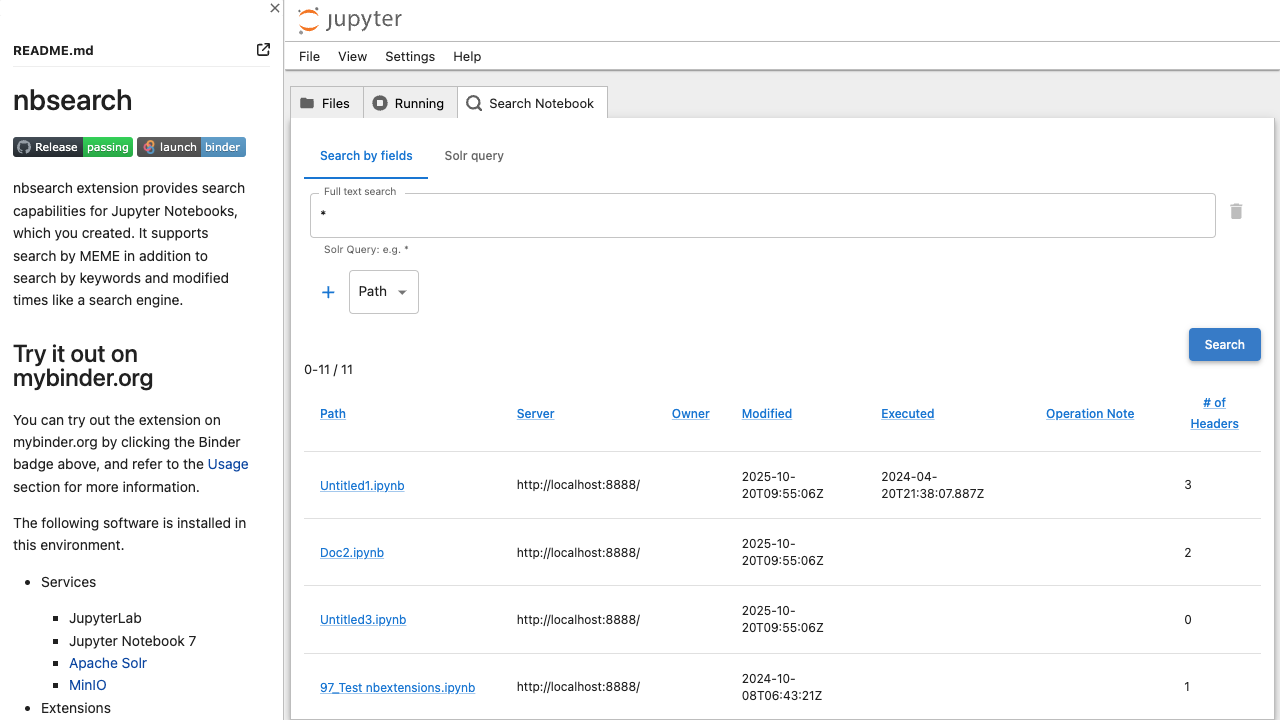

In [18]:
async def _step(page):
    # Check that at least one result row is visible
    result_rows = page.locator('.nbsearch-results-root .MuiTableBody-root tr')
    count = await result_rows.count()
    
    print(f"Found {count} search results")
    assert count > 0, "No search results found"

await run_pw(_step)

## Click the first result row to open notebook in new tab

Start epoch: 1761001579.213412 seconds
Notebook opened in new tab: http://localhost:8888/notebooks/nbsearch-tmp/Untitled1%20(5).ipynb


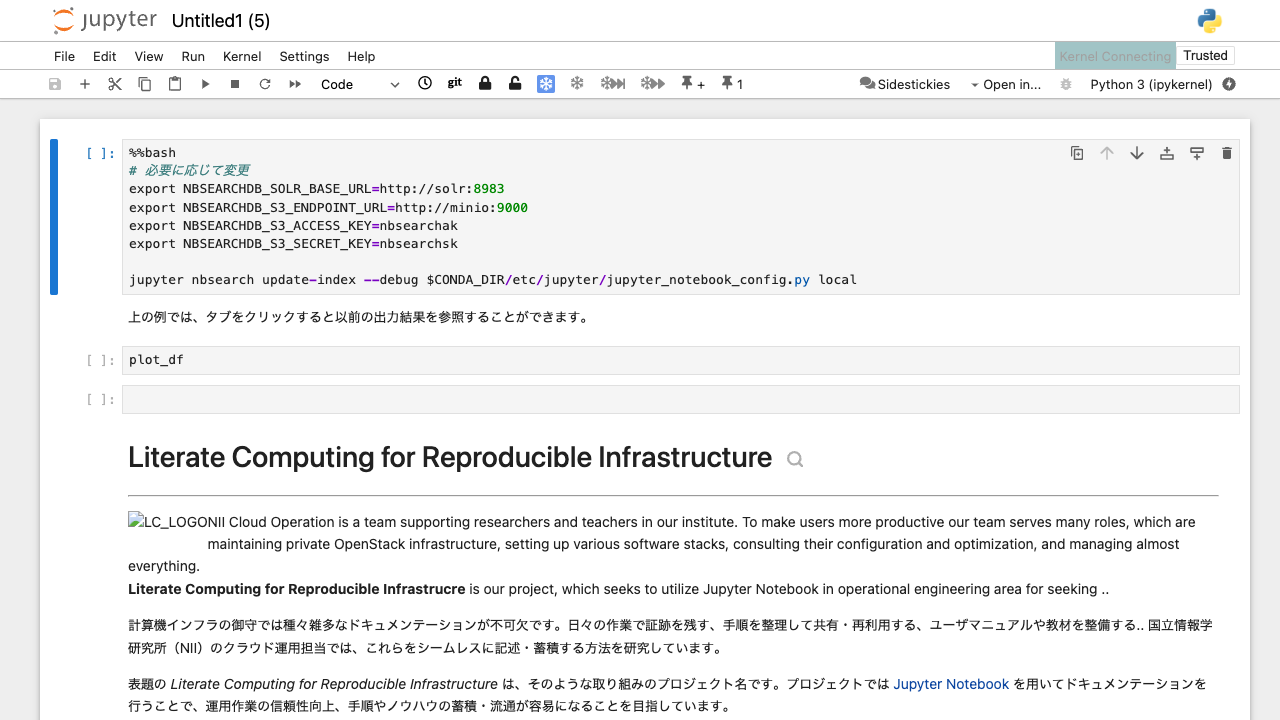

In [19]:
import re

notebook_popup = None

async def _step(page):
    # Wait for a new window (popup) to open when clicking the result
    popup_future = page.wait_for_event('popup')
    
    # Click on the first result row
    first_row = page.locator('.nbsearch-results-root .MuiTableBody-root tr').first
    await first_row.locator('button').click()
    
    # Wait for popup to open
    popup = await popup_future
    
    # Wait for the notebook to load in the new tab
    await expect(popup.locator('.jp-Notebook')).to_be_visible(timeout=transition_timeout)
    
    print(f"Notebook opened in new tab: {popup.url}")
    
    global notebook_popup
    notebook_popup = popup
    return popup

await run_pw(_step)

## Verify the notebook content is visible in the new tab

Start epoch: 1761001582.5807009 seconds
Found 6 cells in the opened notebook


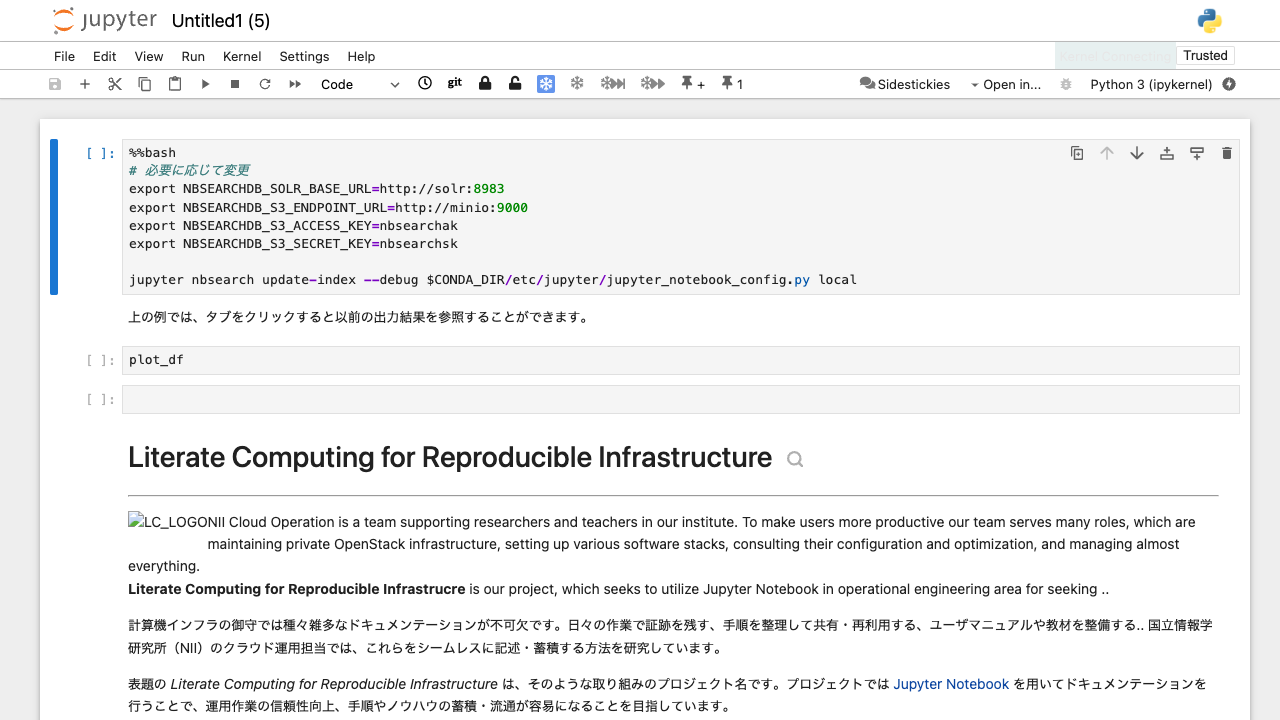

In [20]:
async def _step(page):
    # Verify that cells are visible in the opened notebook
    cells = page.locator('.jp-Cell')
    cell_count = await cells.count()
    
    print(f"Found {cell_count} cells in the opened notebook")
    assert cell_count > 0, "No cells found in the opened notebook"

await run_pw(_step)

## Clean up

In [21]:
await finish_pw_context()

Video: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpcszd0w48/video-1.webm
Video: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpcszd0w48/video-2.webm
HAR: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpcszd0w48/har.zip


スクリーンキャプチャ動画の取得に失敗しました。
Traceback (most recent call last):
  File "/Users/yazawa/workspace/nii-cloud/nbsearch/ui-tests/e2e-notebook/notebooks/scripts/playwright.py", line 202, in _finish_pw_context
    shutil.copyfile(video_path, dest_video_path)
  File "/Users/yazawa/.pyenv/versions/3.11.5/lib/python3.11/shutil.py", line 256, in copyfile
    with open(src, 'rb') as fsrc:
         ^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpxhby0mnb/videos/8d10e5b5f539adacbe8944705cf3e5f9.webm'
スクリーンキャプチャ動画の取得に失敗しました。
Traceback (most recent call last):
  File "/Users/yazawa/workspace/nii-cloud/nbsearch/ui-tests/e2e-notebook/notebooks/scripts/playwright.py", line 202, in _finish_pw_context
    shutil.copyfile(video_path, dest_video_path)
  File "/Users/yazawa/.pyenv/versions/3.11.5/lib/python3.11/shutil.py", line 256, in copyfile
    with open(src, 'rb') as fsrc:
         ^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such

In [22]:
!rm -fr {work_dir}